In [1]:
import pandas as pd 
import numpy as np 
splice_folder = 'splice_est/spliceH_est/noReads'

# first, we deal with the simple case of 555111
1, Functions that extract the true intron_h, seed, lambda_init, burst_size, and the different estimated splice rates by different methods. Also, the cases where it fails. --> reduces the number of lines by 5 folds
2, Function that draw the distribution of the estimated splice rates by different methods, against the line x=y too, given input data from 1

In [21]:
def read_splice_est(fn, trueH_ranges=list(np.arange(3, 12, 1))+list(np.arange(13, 21, 2))):
    '''
    
    :param fn:  varyIntron_F1_S64_B30_lamb2.csv
    :param trueH_ranges: 
    :return: 
    '''
    seed= int(fn.split('/')[-1].split('_S')[1].split('_')[0])  # 64
    burst_size = int(fn.split('/')[-1].split('_B')[1].split('_')[0])  # 30
    lambda_init = float(fn.split('/')[-1].split('_lamb')[1].split('.csv')[0])  # 2
    try:
        df = pd.read_csv(fn)  # it can fail if there is nothing in the file
        df = df[df['is_intron']] # we will only about this line in the result dataframe because all other things are equal in this experiment
        df['seed']=seed
        df['burst_size']=burst_size
        df['lambda_init']=lambda_init
        df.rename(columns={'intron_h':'true_intron_h'}, inplace=True)
        df.drop(columns=['is_PAS', 'PAS_h'], inplace=True)
        finished_h = df['true_intron_h'].values
        df['fn'] = fn
    except:
        df = pd.DataFrame()
        finished_h = []
        print('fn failed:', fn)
    # now, we figure out the intron_h cases that did not produce results 
    missing_h = np.setdiff1d(np.array(trueH_ranges), finished_h)
    miss_df = pd.DataFrame()
    miss_df['true_intron_h'] = missing_h
    miss_df['seed'] = seed
    miss_df['burst_size'] = burst_size
    miss_df['lambda_init'] = lambda_init
    return df, miss_df

def read_splice_est_one_result(fn):
    df = pd.read_csv(fn, header = 0, index_col=None, sep = ',')  # it can fail if there is nothing in the file
    df = df[df['is_intron']] # we will only about this line in the result dataframe because all other things are equal in this experiment
    return df,_

def read_splice_est_all(folder, trueH_ranges=list(np.arange(3, 12, 1))+list(np.arange(13, 21, 2))):
    '''
    
    :param folder: 
    :return: 
    '''
    import glob
    all_files = glob.glob(folder + "/result_*.csv")
    df_list = []
    miss_df_list = []
    for fn in all_files:
        df, _ = read_splice_est_one_result(fn)
        df_list.append(df)
        # miss_df_list.append(miss_df)
    df = pd.concat(df_list, axis=0, ignore_index=True)
    # miss_df = pd.concat(miss_df_list, axis=0, ignore_index=True)
    return df

splice_est/spliceH_est/noReads/result_218.csv
Index(['feature', 'start', 'end', 'length', 'txrate', 'is_intron', 'intron_h',
       'is_PAS', 'PAS_h', 'time', 'h_0', 'h_1', 'h_2', 'h_all', 'h_comb',
       'h_comb_and_all'],
      dtype='object')
splice_est/spliceH_est/noReads/result_679.csv
Index(['feature', 'start', 'end', 'length', 'txrate', 'is_intron', 'intron_h',
       'is_PAS', 'PAS_h', 'time', 'h_0', 'h_1', 'h_2', 'h_all', 'h_comb',
       'h_comb_and_all'],
      dtype='object')
splice_est/spliceH_est/noReads/result_435.csv
Index(['feature', 'start', 'end', 'length', 'txrate', 'is_intron', 'intron_h',
       'is_PAS', 'PAS_h', 'time', 'h_0', 'h_1', 'h_2', 'h_all', 'h_comb',
       'h_comb_and_all'],
      dtype='object')
splice_est/spliceH_est/noReads/result_175.csv
Index(['feature', 'start', 'end', 'length', 'txrate', 'is_intron', 'intron_h',
       'is_PAS', 'PAS_h', 'time', 'h_0', 'h_1', 'h_2', 'h_all', 'h_comb',
       'h_comb_and_all'],
      dtype='object')
splice_est/s

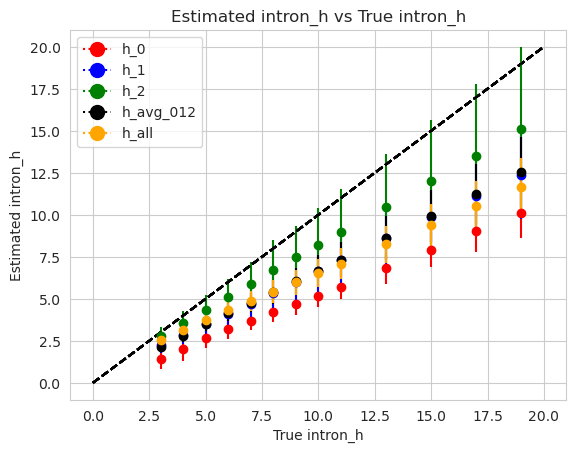

In [25]:
df = read_splice_est_all(splice_folder)
df['h_avg_012'] = df[[f'h_{i}' for i in range(3)]].mean(axis=1)
# draw a pot where the x-axis are true intron_h, and the y-axis are the estimated intron_h by different methods: h_0, h_1, h_2, h_avg_012, h_W, h_noW
# It should be a scatter plot such that the dots are accompanied by the standard deviation of the estimated values
# color of the dots should be based on the names of the methods: h_0, h_1, h_2, h_avg_012, h_W, h_noW
# the line x=y should be drawn too as broken line
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig, ax = plt.subplots()
for true_h in df['intron_h'].unique():
    df_sub = df[df['intron_h']==true_h]
    ax.errorbar(true_h, df_sub['h_0'].mean(), yerr=df_sub['h_0'].std(), fmt='o', color='red', label='h_0')
    ax.errorbar(true_h, df_sub['h_1'].mean(), yerr=df_sub['h_1'].std(), fmt='o', color='blue', label='h_1')
    ax.errorbar(true_h, df_sub['h_2'].mean(), yerr=df_sub['h_2'].std(), fmt='o', color='green', label='h_2')
    ax.errorbar(true_h, df_sub['h_avg_012'].mean(), yerr=df_sub['h_avg_012'].std(), fmt='o', color='black', label='h_avg_012')
    ax.errorbar(true_h, df_sub['h_all'].mean(), yerr=df_sub['h_all'].std(), fmt='o', color='orange', label='h_W')
    # ax.errorbar(true_h, df_sub['h_noW'].mean(), yerr=df_sub['h_noW'].std(), fmt='o', color='purple', label='h_noW')
    # ax.errorbar(true_h, df_sub['h_W'].mean(), yerr=df_sub['h_W'].std(), fmt='o', color='orange', label='h_W')
    # ax.errorbar(true_h, df_sub['h_noW'].mean(), yerr=df_sub['h_noW'].std(), fmt='o', color='purple', label='h_noW')
    ax.plot([0, 20], [0, 20], 'k--')
ax.set_xlabel('True intron_h')
ax.set_ylabel('Estimated intron_h')
ax.set_title('Estimated intron_h vs True intron_h')
# write a legend underneath the plot such that we can say h_0 is red, h_1 is blue, h_2 is green, h_avg_012 is black, h_W is orange, h_noW is purple
# custom legend
colors = {
    'h_0': 'red',
    'h_1': 'blue',
    'h_2': 'green',
    'h_avg_012': 'black',
    'h_all': 'orange'} #,
#     'h_W': 'orange',
#     'h_noW': 'purple'
# }
labels = ['h_0', 'h_1', 'h_2', 'h_avg_012', 'h_all'] #, 'h_W', 'h_noW']
legend_handles = [Line2D([0], [0], color=colors[label], linestyle=':', marker='o', markersize=10) for label in labels]
ax.legend(legend_handles, labels)

plt.show()
    

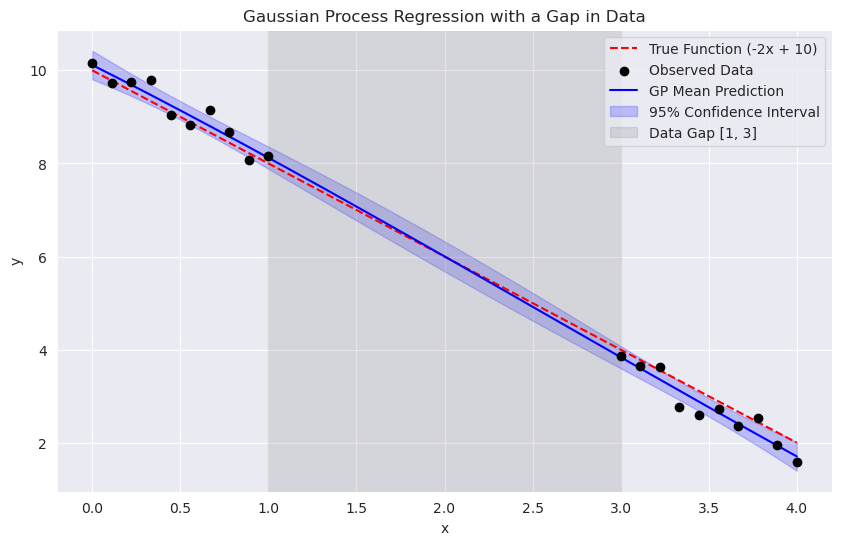

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define the true function
def true_function(x):
    return -2 * x + 10

# Generate observed data points
np.random.seed(42)
x_obs_1 = np.linspace(0, 1, 10)  # Data in [0, 1]
x_obs_2 = np.linspace(3, 4, 10)  # Data in [3, 4]
x_obs = np.concatenate([x_obs_1, x_obs_2])
y_obs = true_function(x_obs) + np.random.normal(0, 0.3, len(x_obs))  # Adding noise

# Combine x_obs into a 2D array for GaussianProcessRegressor
x_obs = x_obs[:, np.newaxis]

# Define the GP with an RBF kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

# Fit the GP to the observed data
gp.fit(x_obs, y_obs)

# Predict over a range including the gap [1, 3]
x_pred = np.linspace(0, 4, 200)[:, np.newaxis]
y_pred, y_std = gp.predict(x_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_pred, true_function(x_pred), 'r--', label="True Function (-2x + 10)")
plt.scatter(x_obs, y_obs, color='black', label="Observed Data", zorder=5)
plt.plot(x_pred, y_pred, 'b-', label="GP Mean Prediction")
plt.fill_between(
    x_pred.ravel(),
    y_pred - 2 * y_std,
    y_pred + 2 * y_std,
    color='blue',
    alpha=0.2,
    label="95% Confidence Interval",
)
plt.axvspan(1, 3, color='gray', alpha=0.2, label="Data Gap [1, 3]")
plt.title("Gaussian Process Regression with a Gap in Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
